In [ ]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("FIT5149_dataset 2.csv")
data.head()

,cid,city.100,city.10,city.105,city.103,city.104,city.102,city.101,city.2119,city.114,...,company_type_Public sector,company_type_Pvt Ltd,academic_discipline_Arts,academic_discipline_Business degree,academic_discipline_Humanities,academic_discipline_No major,academic_discipline_Other,academic_discipline_STEM,relevant_experience_Has relevant experience,relevant_experience_No relevant experience
0,7124,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,51,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,13137,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,2769,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,8374,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import cross_val_score

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11494 entries, 0 to 11493
Data columns (total 86 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   cid                                          11494 non-null  int64  
 1   city.100                                     11494 non-null  int64  
 2   city.10                                      11494 non-null  int64  
 3   city.105                                     11494 non-null  int64  
 4   city.103                                     11494 non-null  int64  
 5   city.104                                     11494 non-null  int64  
 6   city.102                                     11494 non-null  int64  
 7   city.101                                     11494 non-null  int64  
 8   city.2119                                    11494 non-null  int64  
 9   city.114                                     11494 non-null  int64  
 10

In [ ]:
data["target"]

0        0
1        1
2        0
3        0
4        1
        ..
11489    0
11490    0
11491    0
11492    1
11493    0
Name: target, Length: 11494, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcaf66898d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcaf6694390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcaf6689310>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcaf6694e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcaf6678850>],
 'means': []}

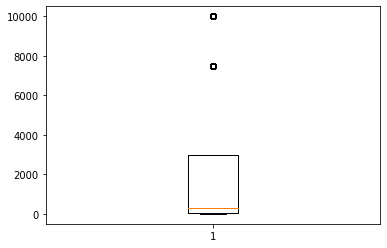

In [ ]:
plt.boxplot(data["company_size"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcaf6169d50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcaf616d810>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcaf6169790>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcaf6174310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcaf6174850>],
 'means': []}

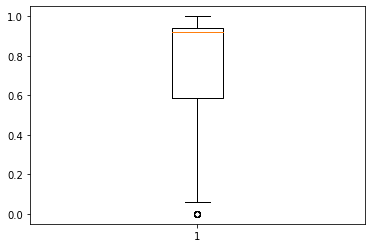

In [ ]:
plt.boxplot(data["city_development_index"])

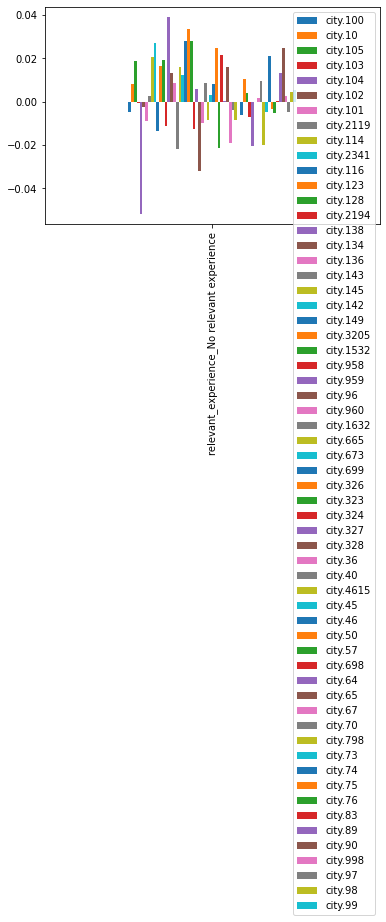

In [ ]:
data.iloc[:,list(range(1,61))+[-1]].corr().iloc[60,0:60].to_frame().T.plot(kind='bar')

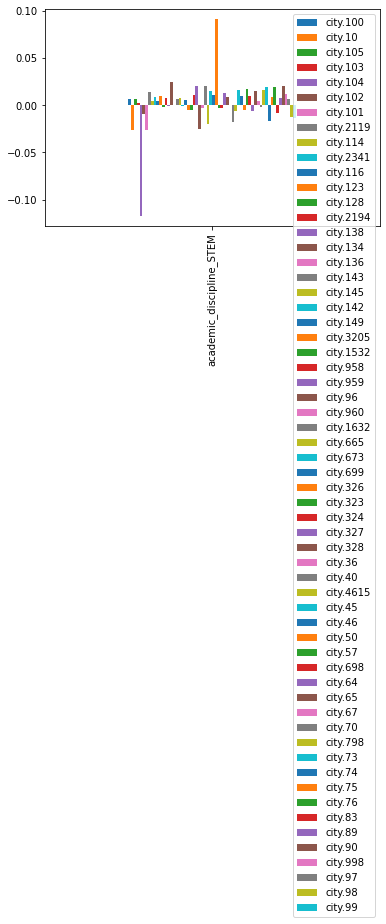

In [ ]:
data.iloc[:,list(range(1,61))+[-3]].corr().iloc[60,0:60].to_frame().T.plot(kind='bar')

In [ ]:
data.iloc[:,list(range(61,85))+[-18]].corr()

,enrolled_university,education_level,experience,company_size,last_new_job,city_development_index,training_hours,target,gender_Female,gender_Male,...,company_type_Public sector,company_type_Pvt Ltd,academic_discipline_Arts,academic_discipline_Business degree,academic_discipline_Humanities,academic_discipline_No major,academic_discipline_Other,academic_discipline_STEM,relevant_experience_Has relevant experience,target
enrolled_university,1.000000,-0.178161,-0.358909,-0.033264,-0.263277,-0.188489,-0.003808,0.164380,-0.016534,-0.077859,...,0.206019,-0.169121,-0.060069,-0.052187,-0.058019,-0.043134,-0.021715,0.109443,-0.403985,0.164380
education_level,-0.178161,1.000000,0.290870,0.127900,0.226253,0.031136,-0.022053,-0.002460,0.082024,-0.020188,...,0.113547,-0.011778,-0.036252,-0.038546,-0.007290,-0.056078,0.018071,0.048724,0.253467,-0.002460
experience,-0.358909,0.290870,1.000000,0.145610,0.485790,0.330997,0.001123,-0.179075,-0.128497,0.181656,...,-0.016113,0.116716,-0.009681,-0.004193,-0.020416,-0.009550,0.004097,0.020138,0.341464,-0.179075
company_size,-0.033264,0.127900,0.145610,1.000000,0.146776,0.062117,-0.017868,0.046240,-0.000080,0.056390,...,0.137630,0.158413,-0.044178,0.041882,-0.026557,-0.019982,0.028754,0.010481,-0.004537,0.046240
last_new_job,-0.263277,0.226253,0.485790,0.146776,1.000000,0.190907,0.001580,-0.082293,-0.049574,0.107281,...,0.024878,0.144925,-0.008672,0.014886,0.019525,-0.016089,0.013352,-0.015065,0.252956,-0.082293
city_development_index,-0.188489,0.031136,0.330997,0.062117,0.190907,1.000000,0.009958,-0.345993,-0.043618,0.077675,...,0.008263,0.022066,0.067750,0.038110,0.077238,0.008338,0.005794,-0.097235,0.065886,-0.345993
training_hours,-0.003808,-0.022053,0.001123,-0.017868,0.001580,0.009958,1.000000,-0.029042,-0.002573,-0.000512,...,-0.014967,-0.010197,-0.010814,0.017931,0.004475,-0.002059,0.009332,-0.009731,0.018556,-0.029042
target,0.164380,-0.002460,-0.179075,0.046240,-0.082293,-0.345993,-0.029042,1.000000,0.037102,-0.059502,...,0.077705,-0.091514,-0.021380,0.004864,-0.014690,-0.000884,0.000505,0.015692,-0.138455,1.000000
gender_Female,-0.016534,0.082024,-0.128497,-0.000080,-0.049574,-0.043618,-0.002573,0.037102,1.000000,-0.824065,...,0.022276,-0.020593,0.001853,0.007479,0.046485,-0.014117,-0.001810,-0.026443,-0.013112,0.037102
gender_Male,-0.077859,-0.020188,0.181656,0.056390,0.107281,0.077675,-0.000512,-0.059502,-0.824065,1.000000,...,0.016371,-0.035081,0.001760,0.005714,-0.025941,0.020831,0.015053,-0.002330,0.088483,-0.059502


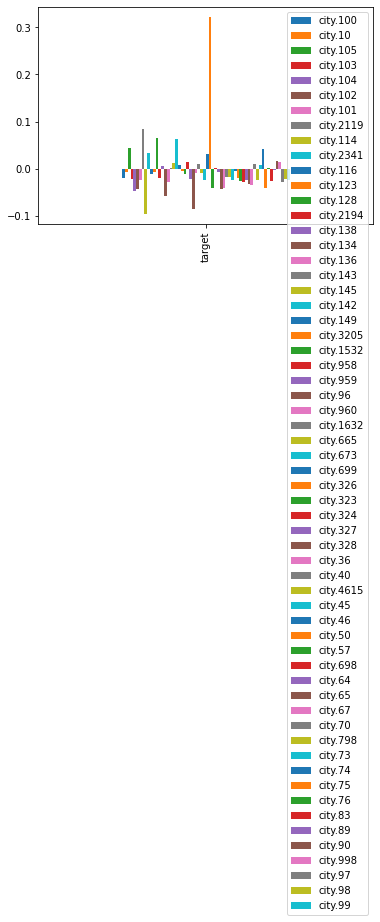

In [ ]:
data.iloc[:,list(range(1,61))+[-18]].corr().iloc[60,0:60].to_frame().T.plot(kind='bar')

In [ ]:
data.corr()

,cid,city.100,city.10,city.105,city.103,city.104,city.102,city.101,city.2119,city.114,...,company_type_Public sector,company_type_Pvt Ltd,academic_discipline_Arts,academic_discipline_Business degree,academic_discipline_Humanities,academic_discipline_No major,academic_discipline_Other,academic_discipline_STEM,relevant_experience_Has relevant experience,relevant_experience_No relevant experience
cid,1.000000,0.003254,-0.007247,-0.009964,-0.008835,-0.009109,-0.006689,0.004923,-0.009488,0.000262,...,0.015786,0.010739,-0.005939,-0.001001,0.004079,0.013553,-0.003918,-0.003209,0.002644,-0.002644
city.100,0.003254,1.000000,-0.008314,-0.004435,-0.009072,-0.037822,-0.008726,-0.004435,-0.007881,-0.019735,...,0.000466,0.000132,-0.009288,-0.009932,-0.002698,-0.009168,0.012766,0.007105,0.004894,-0.004894
city.10,-0.007247,-0.008314,1.000000,-0.007532,-0.015404,-0.064224,-0.014816,-0.007532,-0.013383,-0.033512,...,0.019817,-0.004031,0.001309,-0.000853,0.007368,0.030550,0.018962,-0.025782,-0.008203,0.008203
city.105,-0.009964,-0.004435,-0.007532,1.000000,-0.008218,-0.034264,-0.007905,-0.004018,-0.007140,-0.017879,...,0.005237,-0.009749,-0.008414,0.000906,-0.006783,0.002392,-0.001345,0.006886,-0.018549,0.018549
city.103,-0.008835,-0.009072,-0.015404,-0.008218,1.000000,-0.070079,-0.016167,-0.008218,-0.014603,-0.036567,...,0.000070,0.015315,-0.006746,0.011023,-0.007625,0.004201,-0.003321,0.002687,0.000722,-0.000722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
academic_discipline_No major,0.013553,-0.009168,0.030550,0.002392,0.004201,0.008288,-0.010839,0.013090,0.003458,-0.008520,...,-0.029487,0.017099,-0.017392,-0.018598,-0.027972,1.000000,-0.021005,-0.350545,-0.039647,0.039647
academic_discipline_Other,-0.003918,0.012766,0.018962,-0.001345,-0.003321,0.023790,0.011741,0.007471,-0.013053,-0.006867,...,0.026739,-0.002384,-0.021279,-0.022755,-0.034224,-0.021005,1.000000,-0.428897,-0.030873,0.030873
academic_discipline_STEM,-0.003209,0.007105,-0.025782,0.006886,0.002687,-0.117574,-0.009560,-0.026728,0.013481,0.004904,...,0.021697,-0.015292,-0.355112,-0.379744,-0.571141,-0.350545,-0.428897,1.000000,0.072814,-0.072814
relevant_experience_Has relevant experience,0.002644,0.004894,-0.008203,-0.018549,0.000722,0.052025,0.002419,0.009030,-0.002559,-0.020445,...,-0.165282,0.150896,-0.005920,-0.036305,-0.039790,-0.039647,-0.030873,0.072814,1.000000,-1.000000


TypeError: ignored

In [ ]:
df = pd.read_csv("A2_change_job_labeled.csv")
df.head()

,cid,city.100,city.10,city.105,city.103,city.104,city.102,city.101,city.2119,city.114,...,education_level,academic_discipline,experience,company_size,company_type,last_new_job,city_development_index,relevant_experience,training_hours,target
0,7124,0,0,0,0,0,0,0,0,0,...,Undergraduate,STEM,15,100-500,NGO,1,0.942116,Has relevant experience,21,no
1,51,0,0,1,0,0,0,0,0,0,...,Undergraduate,STEM,4,50-99,Funded startup,1,0.219561,No relevant experience,92,yes
2,13137,0,0,0,0,0,0,0,0,0,...,High School,STEM,8,50-99,Pvt Ltd,>4,0.499002,Has relevant experience,21,no
3,2769,0,0,0,0,0,0,0,0,0,...,Undergraduate,STEM,2,50-99,Pvt Ltd,never,0.351297,No relevant experience,114,no
4,8374,0,0,0,0,0,0,0,0,0,...,PhD,STEM,7,5000-9999,Public sector,1,0.626747,Has relevant experience,24,yes


In [ ]:
city='city.326'
nominal=['gender','company_type','relevant_experience']
ordinal=['experience','enrolled_university','city_development_index']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(df[nominal]).toarray())
enc_df.columns=enc.get_feature_names_out()

In [ ]:
enc_df

,gender_Female,gender_Male,gender_Other,company_type_Early stage startup,company_type_Funded startup,company_type_NGO,company_type_Other,company_type_Public sector,company_type_Pvt Ltd,relevant_experience_Has relevant experience,relevant_experience_No relevant experience
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11489,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
11490,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
11491,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
11492,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
df[[city]+ordinal]

,city.326,experience,enrolled_university,city_development_index
0,0,15,No enrollment,0.942116
1,0,4,No enrollment,0.219561
2,0,8,No enrollment,0.499002
3,1,2,Full time,0.351297
4,0,7,Full time,0.626747
...,...,...,...,...
11489,0,16,No enrollment,0.942116
11490,0,9,No enrollment,0.942116
11491,0,>20,No enrollment,0.942116
11492,1,4,Part time,0.351297


In [ ]:
data=df[[city]+ordinal].join(enc_df).join(pd.DataFrame(df['target']))
data

,city.326,experience,enrolled_university,city_development_index,gender_Female,gender_Male,gender_Other,company_type_Early stage startup,company_type_Funded startup,company_type_NGO,company_type_Other,company_type_Public sector,company_type_Pvt Ltd,relevant_experience_Has relevant experience,relevant_experience_No relevant experience,target
0,0,15,No enrollment,0.942116,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,no
1,0,4,No enrollment,0.219561,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,yes
2,0,8,No enrollment,0.499002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,no
3,1,2,Full time,0.351297,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,no
4,0,7,Full time,0.626747,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11489,0,16,No enrollment,0.942116,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,no
11490,0,9,No enrollment,0.942116,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,no
11491,0,>20,No enrollment,0.942116,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,no
11492,1,4,Part time,0.351297,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,yes


In [ ]:
data = pd.read_csv("outselected feature.csv")
data

,Unnamed: 0,city.326,experience,enrolled_university,city_development_index,gender_Female,gender_Male,gender_Other,company_type_Early stage startup,company_type_Funded startup,company_type_NGO,company_type_Other,company_type_Public sector,company_type_Pvt Ltd,relevant_experience_Has relevant experience,relevant_experience_No relevant experience,target
0,0,0,15,0,0.942116,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,1,0,4,0,0.219561,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,2,0,8,0,0.499002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
3,3,1,2,2,0.351297,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
4,4,0,7,2,0.626747,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11489,11489,0,16,0,0.942116,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
11490,11490,0,9,0,0.942116,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
11491,11491,0,21,0,0.942116,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
11492,11492,1,4,1,0.351297,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1


Train and Split

In [ ]:
y = data['target'].to_numpy()

In [ ]:
y

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
X = data.drop(['target'],axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.1, random_state = 1)

In [ ]:
X_train

,Unnamed: 0,city.326,experience,enrolled_university,city_development_index,gender_Female,gender_Male,gender_Other,company_type_Early stage startup,company_type_Funded startup,company_type_NGO,company_type_Other,company_type_Public sector,company_type_Pvt Ltd,relevant_experience_Has relevant experience,relevant_experience_No relevant experience
11417,11417,0,21,0,0.950100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1847,1847,1,7,0,0.351297,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7669,7669,0,9,2,0.499002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2445,2445,0,21,0,0.942116,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9695,9695,0,13,0,0.942116,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,7813,0,9,1,0.774451,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
10955,10955,0,9,0,0.894212,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
905,905,0,21,0,0.922156,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5192,5192,0,21,0,0.928144,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


Imbalance

In [ ]:
ros = RandomOverSampler(random_state = 1)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [ ]:
X_train_ros

,Unnamed: 0,city.326,experience,enrolled_university,city_development_index,gender_Female,gender_Male,gender_Other,company_type_Early stage startup,company_type_Funded startup,company_type_NGO,company_type_Other,company_type_Public sector,company_type_Pvt Ltd,relevant_experience_Has relevant experience,relevant_experience_No relevant experience
0,11417,0,21,0,0.950100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1847,1,7,0,0.351297,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,7669,0,9,2,0.499002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2445,0,21,0,0.942116,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,9695,0,13,0,0.942116,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15659,1471,0,21,0,0.952096,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15660,858,1,2,0,0.351297,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15661,7317,1,10,0,0.351297,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15662,996,0,2,0,0.942116,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
len(X_train_ros)

15664

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[821  23]
 [261  45]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       844
           1       0.66      0.15      0.24       306

    accuracy                           0.75      1150
   macro avg       0.71      0.56      0.55      1150
weighted avg       0.73      0.75      0.69      1150



In [ ]:
svclassifier1 = SVC(kernel='rbf')
svclassifier1.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svclassifier1.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[844   0]
 [306   0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       844
           1       0.00      0.00      0.00       306

    accuracy                           0.73      1150
   macro avg       0.37      0.50      0.42      1150
weighted avg       0.54      0.73      0.62      1150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
scores = cross_val_score(svclassifier, X, y, cv=5)
scores

KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import ParameterGrid

In [ ]:
grid = ParameterGrid({"max_samples": [0.5, 1.0],
                          "max_features": [0.5, 1.0],
                          "bootstrap": [True, False],
                          "bootstrap_features": [True, False]})

In [ ]:
grid

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)